# Attributing Authorship w/ Stylometry
<i>Stylometry</i> is the quantitative study of literary style through computational text analysis. It's based on the idea that we all have unique, consistent, and recognizable style to our writing. This includes our vocabulary, our use of punctuation, the average length of our sentences and words, and so on.

Stylometry has been used to overturn murder convictions and even helped identify and convict the Unabomber in 1996. Other uses include detecting plagiarism and determining the emotional tone behind words, such as in social media posts.

### The Objective
Write a Python program that uses stylometry to determine whether Sir Arthour Conan Doyle or H. G. Wells wrote the novel <i>The Lost World</i>.

### The Strategy
The science of <i>natural language processing</i> (NLP) deals with the interactions between the precise and structured language of computers and the nuanced freqhently ambiguous "natural" language used by humans. Example uses for NLP include machine translations, spam detection, comprehension of search engine questions, and predictive text recognition for cell phone users.
The most common NLP tests for authorship analyze the following features of a text:
    <b>Word Length</b>: a frequency distribution plot of the length of words in a document
    <b>Stop Words</b>: a frequency distribution plot of stop words (short, noncontextual function words like "the", "but", and "if")
    <b>Parts of Speech</b>: a frequency distribution plot of words based on their syntactic functions (such as nouns, pronouns, verbs, adverbs, adjectives, and so on)
    <b>Most Common Words</b>: a comparison of the most commonly used words in a text
    <b>Jaccard Similarity</b>: a statistic used for gauging the similarity and diversity of a sample set
If Doyle and Wells have distinctive writing styles, these five tests should be enough to distinguish between them.
To capture and analyze each author's style, you'll need a representtive <i>corpus</i>, or a body of text. FOr Dyle, use the famous Sherlock Holmes novel <i>The Hound of the Baskervilles</i>, published in 1902. For Wells, use <i>The War of the Worlds</i>, published in 1898.

Both these novels contain more than 50,000 words, more than enough for a sound statistical sampling. You'll then compare each author's sample to <i>The Lost World</i> to determine how closely the writing styles match.

To perform stylometry, we'll use the <i>National Language Toolkit</i> (NLTK), a popular suite of programs and libraries for working with human language data in Python. Created in 2001 as part of a computational linguistics course at the University of Pennsylvania, NLTK has continued to develop and expand with the help of dozens of contributors. To learn more, check out the official NLTK website at http://www.nltk.org/.

### Downloading the Tokenizer
To run the stylometric tests, you'll need to break the multiple texts - or corpora - into individualized words, referred to as tokens.
The `word_tokenize()` method in NLTK implicitly calls `sent_tokenize()`, `tokenize()`, you'll need the Punkt Tokenizer Models. Although this is part of NLTK, you'll have to download it separately with the handy NLTK Downloader. To launch it, enter the following into the Python shell:

In [2]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

The NLTK Downloader window should now be open. Click either the <b>Models</b> or <b>All Packages</b> tab near the top, then click <b> punkt</b> in the Identifier column. Scroll to the bottom of the window and set the Download Directory for your platform. Finally, click the <b>Download</b> button to download the Punkt Tokenizer Models.
Note that you can also download NLTK packages directly in the shell. Here's an example:

In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dylan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Downloading the Stopwords Corpus
Click the <b>Corpora</b> tab in the NLTK Downloader window and download the Stopwords Corpus.
We should download one more package to help us analyze parts of speech, like nowns and verbs. Click the <b>All Packages</b> tab in the NLTK Downloader window and download the Averaged Perceptron Tagger.

### The Corpora
You can download the text files for <i>The Hound of the Baskervilles</i> (hound.txt), <i>The War of the Worlds</i> (war.txt), and <i>The Lost World</i> (lost.txt), along with the books code, from the GitHub repo with this file.

These came from Project Gutenberg (`http://www.gutenberg.org/`), a great source for public domain literature. So that you can use these texts right away, we've stripped them of extraneous material such as table of contents, chapter titles, copyright information, and so on.

### The Stylometry Code
The <i>stylometry.py</i> program you'll write next loads the text files as strings, tokenizes them into words, and then runs the five stylometric analyses listed above. The program will output a combination of plots and shell messages that will help you determine who wrote <i>The Lost World</i>.
Make sure to keep the program in the same folder as the three text files.

In [4]:
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

LINES = ['-', ':', '--'] #Line styles for plots

def main():
    strings_by_author = dict()
    strings_by_author['doyle'] = text_to_string('hound.txt')
    strings_by_author['wells'] = text_to_string('war.txt')
    strings_by_author['unknown'] = text_to_string('lost.txt')

    print(strings_by_author['doyle'][:300])

    words_by_author = make_word_dict(strings_by_author)
    len_shortest_corpus = find_shortest_corpus(words_by_author)
    word_length_test(words_by_author, len_shortest_corpus)
    stopwords_test(words_by_author, len_shortest_corpus)
    parts_of_speech_test(words_by_author, lent_shortest_corpus)
    vocab_test(words_by_author)
    jaccard_test(words_by_author, len_shortest_corpus)

#### Loading Text and Building a Word Dictionary
The next block of text defines two functions. The first reads in a text file as a string. The second builds a dictionary with each author's name as the key and his novel, now tokenized into individual words rather than a continuous string as the value.

In [5]:
def text_to_string(filename):
    #Read a text file and return a string
    with open(filename) as infile:
        return infile.read()

def make_word_dict(strings_by_author):
    #Return dictioniary of tokenized words by corpus by author
    words_by_author = dict()
    for author in strings_by_author:
        tokens = nltk.word_tokenize(strings_by_author[author])
        words_by_author[author] = ([token.lower() for token in tokens if token.isalpha()])
    return words_by_author

Some users may encounter a UnicodeDecodeError like the following one when loading the text:

`UnicodeDecodeError: 'ascii' codec can't decode byte 0x93 in position 365: ordinal not in range(128)`

Encoding and decoding refer to the process of converting from characters stored as bytes to human-readable strings. The problem is that the default encoding forthe built-in function `open()` is platform dependent and depends on the value of `locale.getpreferredencoding()`.

### Finding the Shortest Corpus
In computational linguistics, frequency refers to the number of occurrences in a corpus. Thus, frequency means the count, and methods you'll use later return a dictionary of words and their counts. To compare counts in a meaningful way, the corpora should all have the same number of words. Because the three corpora used here are large, you can safely normalize the corpora by truncating them all to the length of the shortest. The code block below defines a function that finds the shortest corpus in the `words_by_author` dictionary and returns its length.

In [6]:
def find_shortest_corpus(words_by_author):
    #Return length of shortest corpus
    word_count = []
    for author in words_by_author:
        word_count.append(len(words_by_author[author]))
        print('\nNumber of words for {} = {}\n'.format(author, len(words_by_author[author])))
        len_shortest_corpus = min(word_count)
        print('length shortest corpus = {}\n'.format(len_shortest_corpus))
        return len_shortest_corpus

### Comparing Word Lengths
Part of an author's distinctive style is the words they use. Faulkner observed that Hemingway never sent a reader running to the dictionary; Hemingway accused Faulkner of using "10-dollar words." Authorial style is expressed in the length of words and in vocabulary, which we'll look at later in the chapter.

The code block below defines a function to compare the length of words per corpus and plot the results as a frequency distribution. In a frequency distribution, the lengths of words are plotted against the number of counts for each length. For words that are six letters long, for example, one author may have a count of 4,000, and another may have a count of 5,500. A frequency distribution allows comparison across a range of word lengths, rather than just at the average word length.

The code block below uses list slicing to truncate the word lists to the length of the shortest corpus so the results aren't skewed by the size of the novel.

In [9]:
def word_length_test(words_by_author, len_shortest_corpus):
    #Plot word length frequency by author, truncated to shortest corpus length
    by_author_length_freq_dist = dict()
    plt.figure(1)
    plt.ion()

    for i, author in enumerate(words_by_author):
        word_lengths = [len(word) for word in words_by_author[author][:len_shortest_corpus]]
        by_author_length_freq_dist[author] = nltk.FreqDist(word_lengths)
        by_author_length_freq_dist[author].plot(15, linestyle=LINES[i], label=author, title='Word Length')
        plt.legend()
        plt.show() #Uncomment to see plot while coding

#### Comparing Stop Words
A stop word is a small word used often, like "the", "by", and "but". These words are filtered out for tasks like online searches, because they provide no contextual information, and they were once thought to be of little value in identifying authorship.

But stop words, used frequently and without much thought, are perhaps the best signature for an author's style. And since the text you're comparing are usually about different subjects, these stop words become important, as they are agnostic to content and common across all texts.

The text block below defines a function to compare the use of stop words in the three corpora.

In [10]:
def stopwords_test(words_by_author, lent_shortest_corpus):
    #Plot stopwords freq by author, truncated to shortest corpus length
    stopwords_by_author_freq_dist = dict()
    plt.figure(2)
    stop_words = set(stopwords.words('english')) #Use set for speed
    #print('Number of stopwords = {}\n'.format(len(stop_words)))
    #print('Stopwords = {}\n'.format(stop_words))

    for i, author in enumerate(words_by_author):
        stopwords_by_author = [word for word in words_by_author[author][:len_shortest_corpus] if word in stop_words]
        stopwords_by_author_freq_dist[author] = nltk.FreqDist(stopwords_by_author)
        stopwords_by_author_freq_dist[author].plot(50, label=author, linestyle=LINES[i], title='50 Most Common Stopwords')

    plt.legend()
    ##plt.show() #Uncomment to see plot while coding function

### Comparing Parts of Speech
Now let's compare the parts of speech used in the three corpora. NLTK uses a part-of-speech (POS) tagger, called `PerceptronTagger`, to identify parts of speech. POS taggers process a sequence of tokenized words and attach a POS tag to each word.

The taggers are typically trained on large datasets like the <i>Penn Treebank</i> or <i>Brown Corpus</i>, making thm highly accurate, though not perfect. You can also find training data and taggers forlanguages other than English. You don't need to worry about all these various terms and their abbreviations. As with previous tests, you'll just need to compare lines in a chart. The code block below defines a function to plot the frequency distribution of POS in the three corpora.

In [11]:
def parts_of_speech_test(words_by_author, len_shortest_corpus):
    #Plot author use of parts of speech such as nouns, verbs, adverbs, etc
    by_author_pos_freq_dist = dict()
    plt.figure(3)
    for i, author in enumerate(words_by_author):
        pos_by_author = [pos[1] for pos in nltk.pos_tag(words_by_author[author][:len_shortest_corpus])]
        by_author_pos_freq_dist[author] = nltk.FreqDist(pos_by_author)
        by_author_pos_freq_dist[author].plot(35, label=author, linestyle=LINES[i], title='Part of Speech')
        plt.legend()
        plt.show()

### Comparing Author Vocabularies
To compare the vocabularies among the three corpora, you'll use the chi-squared random variable (X<sup>2</sup>), also known as the <i>test statistic</i>, to measure the "distance" between the vocabularies employed in the unknown corpus and each of the known corpora. The closest vocabularies will be the most similar. The formula is:

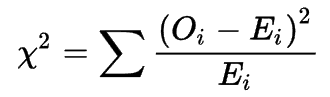

Where <i>O</i> is the observed word count and <i>E</i> is the expected word count assuming the corpora being compared are both by the same author. If Dyle wrote both novbels, they should both have the same, or a similar, proportion of the most common words. The test statistic lets you quantify how similar they are by measuring how much the counts for each word differ. The lower the chi-squared test statistic, the greater the similarity between two distributions.

The code block below defines a function to compare vocabularies among the three corpora.

In [ ]:
def vocab_test(words_by_author):
    #Compare author vocabularies using the chi-squared statistical test
    chisquared_by_author = dict()
    for author in words_by_author:
        if author != 'unknown':
            combined_corpus = (words_by_author[author] + words_by_author['unknown'])
            author_proportion = (len(words_by_author[author]) / len(combined_corpus))
            combined_freq_dist = nltk.FreqDist(combined_corpus)
            most_common_words = list(combined_freq_dist.most_common(1000))
            chisquared = 0
            for word, combined_count in most_common_words:
                observed_count_author = words_by_author[author].count(word)
                expected_count_author = combined_count * author_proportion
                chisquared += ((observed_count_author - expected_count_author) ** 2 / expected_count_author)
                chisquared_by_author[author] = chisquared
            print('Chi-squared for {} = {:.1f}'.format(author,chisquared))
    most_likely_author = min(chisquared_by_author, key=chisquared_by_author.get)
    print('Most-likely author by vocabulary is {}\n'.format(most_likely_author))

### Calculating Jaccard Similarity
To determine the degree of similarity among sets created from the corpora, we'll use the <i>Jaccard similarity coefficient</i>. Also called the "intersection over union", this is simply the area of overlap between two sets divided by the area of the union of the two sets.

The more overlap there is between sets created from two texts, the more likely they were written by the same author.
The code block below defines a function for gauging the similarity of sample sets, and makes sure the main() program is run when it is the main file.

In [ ]:
def jaccard_test(words_by_author, len_shortest_corpus):
    #Calculate Jaccard similarity fo eah known corpus to unknown corpus
    jaccard_by_author = dict()
    unique_words_unknown = set(words_by_author['unknown'][:len_shortest_corpus])
    authors = (author for author in words_by_author if author != 'unknown')
    for author in authors:
        unique_words_author = set(words_by_author[author][:len_shortest_corpus])
        shared_words = unique_words_author.intersection(unique_words_unknown)
        jaccard_sim = (float(len(shared_words)) / (len(uniqueA_words_author) + len(unique_words_unknown) - len(shared_words)))
        jaccard_by_author[author] = jaccard_sim
        print('Jaccard Similarity for {} = {}'.format(author, jaccard_sim))
    most_likely_author = max(jaccard_by_author, key=jaccard_by_author.get)
    print('Most-likely author by similarity is {}'.format(most_likely_author))

if __name__ == '__main__':
    main()